# **WEEK-1** - Inspect Column Types and Missing Values

**Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pickle

In [ ]:
# Load data
df = pd.read_csv("/content/Real estate.csv")

In [ ]:
df.shape

(414, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Drop the 'No' column
df_cleaned = df.drop(columns=['No'])

In [ ]:
# Features and target
X = df_cleaned.drop(columns=['Y house price of unit area'])
y = df_cleaned['Y house price of unit area']

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(53.505619124504506, 0.6810580555095801)

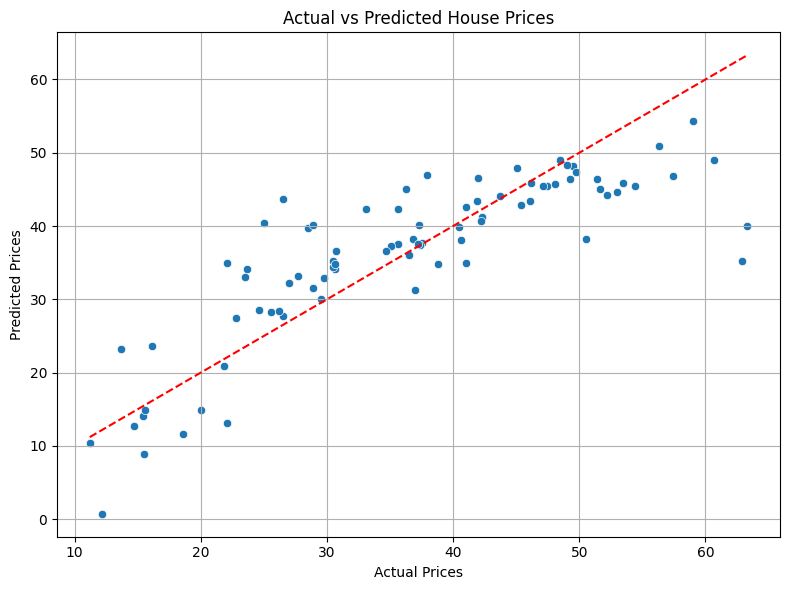

In [ ]:
# Visualize Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ideal line
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Create a function to predict house price for custom inputs
def predict_price(transaction_date, house_age, mrt_distance, stores, latitude, longitude):
    input_data = pd.DataFrame([[transaction_date, house_age, mrt_distance, stores, latitude, longitude]],
                              columns=X.columns)
    predicted_price = model.predict(input_data)[0]
    return predicted_price

In [ ]:
# Example prediction
example_prediction = predict_price(
    transaction_date=2013.5,
    house_age=10.0,
    mrt_distance=300.0,
    stores=5,
    latitude=24.98,
    longitude=121.54
)
example_prediction

np.float64(48.98943243226677)

In [ ]:
# Example usage:
predicted_price = predict_price(
    transaction_date=2013.5,    # e.g., July 2013
    house_age=10.0,             # 10 years old
    mrt_distance=300.0,         # 300 meters from MRT
    stores=5,                   # 5 convenience stores nearby
    latitude=24.98,             # Latitude
    longitude=121.54            # Longitude
)

print(f"Predicted house price per unit area: {predicted_price:.2f}")


Predicted house price per unit area: 48.99


# **WEEK-2 - Handle Outliers and Duplicates**

# **Remove Outliers using IQR (for X2 house age)**

In [7]:
import pandas as pd

# Load data
df = pd.read_csv("/content/Real estate.csv")

# Original shape
original_shape = df.shape

# IQR method for X2 house age
Q1 = df['X2 house age'].quantile(0.25)
Q3 = df['X2 house age'].quantile(0.75)
IQR = Q3 - Q1

# Filter condition
condition = ~((df['X2 house age'] < Q1 - 1.5 * IQR) | (df['X2 house age'] > Q3 + 1.5 * IQR))
df = df[condition]


# **Remove Duplicates**

In [9]:
import os
os.makedirs("data", exist_ok=True)  # ✅ This creates the folder if it doesn't already exist


In [10]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Shape after cleaning
cleaned_shape = df.shape

# Save cleaned data (optional for reuse)
df.to_csv("data/cleaned_data.csv", index=False)


In [11]:
print("Original rows:", original_shape[0])
print("Cleaned rows:", cleaned_shape[0])
print("Rows removed:", original_shape[0] - cleaned_shape[0])


Original rows: 414
Cleaned rows: 414
Rows removed: 0




---


# **Cleaning Summary**
- **Column cleaned for outliers:** `X2 house age`
- **Method used:** Interquartile Range (IQR)
- **Duplicates removed:** Yes (checked using `drop_duplicates()`)

#### Row Statistics:
- Original number of rows: **414**
- After removing outliers and duplicates: **414**
- Rows removed: **0**

#### Conclusion:
The dataset is already clean — no outliers were detected using IQR, and no duplicate entries were found. This makes the dataset ready for the next step: feature selection and visualization.
